<a href="https://colab.research.google.com/github/GerardoMunoz/PresentacionesAlgebraLineal/blob/main/PCA_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

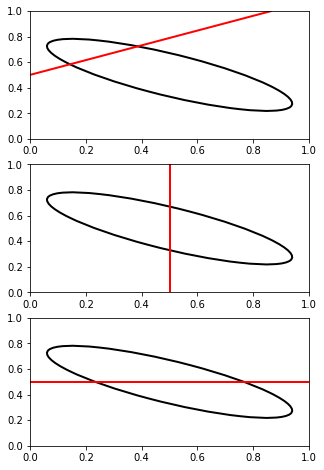

In [ ]:
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt

xcenter, ycenter = 0.5, 0.5
width, height = 1, 3e-1
angle = -30

fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(311, aspect='auto')
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e2)
r2 = patches.Rectangle((0, 0.5), 1, 0,
                     angle=-angle, linewidth=2, fill=False, zorder=2, color='r')
ax.add_patch(r2)

ax = fig.add_subplot(312, aspect='auto')
e3 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e3)
r3 = patches.Rectangle((0.5, 0.0), 1, 0,
                     angle=90, linewidth=2, fill=False, zorder=2, color='r')
ax.add_patch(r3)
ax = fig.add_subplot(313, aspect='auto')
e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e1)
r1 = patches.Rectangle((0, 0.5), 1, 0,
                     angle=0, linewidth=2, fill=False, zorder=2, color='r')
ax.add_patch(r1)


# Problema de reducción de dimensionalidad
Fulanito ganó la licitación publica para definir la primera linea (recta) de metro de una ciudad, porque propuso que la iba diseñar lo más justo posible para todos los ciudadanos. 

Para explicar como la iba a definir, primero genero puntos aleatorios sobre una elipse simulando donde estaban las personas en una ciudad.

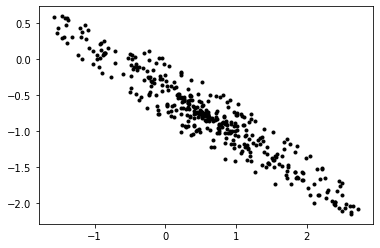

In [ ]:
n_vectors=400
d=2

rnd_vec=np.random.uniform(-1, 1, size=(n_vectors, d))                # the initial random vectors
unif=np.random.uniform(size=n_vectors)                               # a second array random numbers
scale_f=np.expand_dims(np.linalg.norm(rnd_vec, axis=1)/unif, axis=1) # the scaling factors
circulo=(rnd_vec/scale_f).T
#rnd_vec.shape         
A=np.array([[1,-2],[-1,1]])
rnd_vec= A @ circulo  +  np.array([[0.6],[-0.8]])        
plt.plot(rnd_vec[0,:], rnd_vec[1,:], '.', color='black')                       

In [ ]:
m,n = rnd_vec.shape
m,n

(2, 400)

`rnd_vec` es un arreglo con dos renglones (m=2) y 400 columnas (n=400). En la figura se ven los 400 puntos.

## El primer paso es __encontrar el centro__ de la ciudad. 
Para hacerlo justo, el centro de la ciudad es el promedio de todos los puntos.  

In [ ]:
centro = (1/n)*np.sum(rnd_vec,axis=1)
centro

array([ 0.59312137, -0.79236607])

## El segundo paso es __ubicar el centro de coordenadas en el centro de la ciudad__.

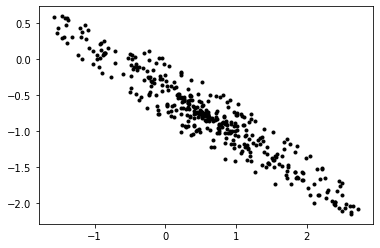

In [ ]:
plt.plot(rnd_vec[0,:], rnd_vec[1,:], '.', color='black') 

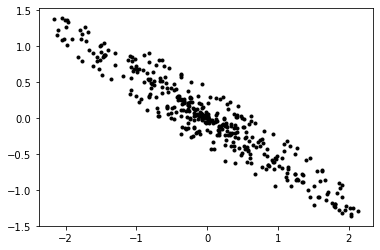

In [ ]:
puntos_centrados = rnd_vec - centro.reshape(2,1)
plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='black')

## El tercer paso es __estimar que tan dispersos están los puntos__ con la matriz de covarianza. 
Este paso requiere tres sub-pasos: Dispersión horizontal ($var(x)$), dispersión vertical ($var(y)$) y la dispersión diagonal ($cov(x,y)$).

Pero antes veamos un par de vectores.

### Vector de las coordenadas horizontales ($\tilde{x}$) y vector de las coordenadas verticales ($\tilde{y}$)

Sabemos que `puntos_centrados` es un arreglo de dos renglones y 400 columnas. El cual llamaremos la matriz $C$.

$C=\begin{bmatrix} x_1 & x_2 & \cdots & x_{400} \\ y_1 & y_2 & \cdots & y_{400} \end{bmatrix} $



In [ ]:
puntos_centrados.shape

(2, 400)

Podemos describir esta matriz por sus columnas, llamando cada punto como un vector.

$C=\begin{bmatrix} \vec{v}_1 & \vec{v}_2 & \cdots & \vec{v}_{400}  \end{bmatrix} $

En este caso nos interesa describir la matriz por sus renglones, porque necesitamos operar todas las coordenadas $x$ por un lado, y por otro, las coordenadas $y$.

$C=\begin{bmatrix} \tilde{x}^T \\ \tilde{y}^T  \end{bmatrix} $

En donde $\tilde{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_{400} \end{bmatrix} $  y $\tilde{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{400} \end{bmatrix} $

In [ ]:
x_tilde = puntos_centrados[0,:]
y_tilde = puntos_centrados[1,:]

### Dispersión horizontal ($var(x)$):

 Si sumamos las coordenadas $x_i$ de todos los puntos debería dar cero, porque el centro de coordenadas coincide ahora con el centro de la ciudad. Pero si sumamos $x_i^2$ ya no da cero porque ahora todos los sumandos son positivos, salvo alguno que sea cero. El promedio de los $x^2$ se llama $var(x)$, y es fácil comprobar que $$var(x)=\frac{\tilde{x} \cdot \tilde{x}}{n}$$ 

In [ ]:
x_tilde.dot(x_tilde)/n

0.8671303794255587


### Dispersión vertical ($var(y)$):

De manera similar se define $$var(y)=\frac{\tilde{y} \cdot \tilde{y}}{n}$$

In [ ]:
y_tilde.dot(y_tilde)/n

0.34008471274616525

### Dispersión diagonal ($cov(x,y)$)

Cuando un punto esta cerca del eje horizontal el valor de $y_i$ es más cercano a cero. Pero si el punto esta cerca del eje vertical el valor de $x_i$ es más cercano a cero. El producto $x_i y_i$ es máximo cuando el punto está cerca a una recta diagonal a 45°. Además, es negativo cerca a la recta diagonal a -45°.

El promedio de la suma de estos productos es se llama $cov(x,y)$ y se define $$cov(x,y)=\frac{\tilde{x} \cdot \tilde{y}}{n}$$

In [ ]:
x_tilde.dot(y_tilde)/n

-0.5162418289028455

### Matriz de covarianza

Recordemos que si $C=\begin{bmatrix} \tilde{x}^T \\ \tilde{y}^T  \end{bmatrix} $ entonce $C^T=\begin{bmatrix} \tilde{x} & \tilde{y}  \end{bmatrix} $

y por lo tanto $\frac{1}{n}CC^T=\begin{bmatrix} \tilde{x}^T \\ \tilde{y}^T  \end{bmatrix} \begin{bmatrix} \tilde{x} & \tilde{y}  \end{bmatrix}=\frac{1}{n}\begin{bmatrix} \tilde{x}^T \tilde{x}&\tilde{x}^T \tilde{y}\\ \tilde{y}^T\tilde{x} & \tilde{y}^T  \tilde{y}\end{bmatrix} = \frac{1}{n}\begin{bmatrix} \tilde{x} \cdot \tilde{x}&\tilde{x} \cdot \tilde{y}\\ \tilde{y} \cdot \tilde{x} & \tilde{y} \cdot \tilde{y}\end{bmatrix} = \begin{bmatrix} var(x)&cov(x,y)\\ cov(y,x) & var(y)\end{bmatrix}$

La cual se conoce como la matriz de covarianza.

In [ ]:
matriz_covarianza = (1/n)*puntos_centrados @ puntos_centrados.T
matriz_covarianza

array([[ 0.86713038, -0.51624183],
       [-0.51624183,  0.34008471]])

La matriz de covarianzas se puede interpretar como una transformación que transforma los puntos dentro de un círculo 

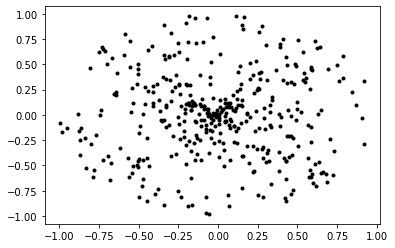

In [ ]:
plt.plot(circulo[0,:], circulo[1,:], '.', color='black')

en los puntos dentro de una elipse

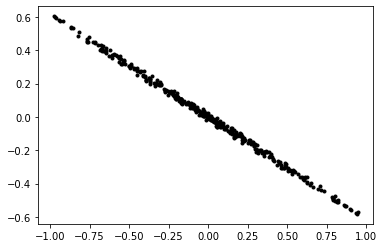

In [ ]:
modelo= matriz_covarianza @ circulo      
plt.plot(modelo[0,:], modelo[1,:], '.', color='black')

## Cuarto paso, __calcular los valores propios de la matriz de covarianza__

Lo interesante es que los valores propios indican los vectores que no cambian de dirección, lo cual corresponde a los ejes de la elipse. Cada valor propio indica lo extensa de la elipse en ese eje. 

In [ ]:
matriz_covarianza.tolist()

[[0.8671303794255587, -0.5162418289028456],
 [-0.5162418289028456, 0.3400847127461652]]

In [ ]:
import sympy as sp
l = sp.symbols('\lambda')
matriz_caracteristica = sp.Matrix(matriz_covarianza.tolist()) - l*sp.eye(2) 
matriz_caracteristica

Matrix([
[0.867130379425559 - \lambda,          -0.516241828902846],
[         -0.516241828902846, 0.340084712746165 - \lambda]])

In [ ]:
sp.det(matriz_caracteristica)

\lambda**2 - 1.20721509217172*\lambda + 0.0283921600914595

In [ ]:
a=1
b=-1.15246555678468
c=0.0281260399705521

l1=(-b + sp.sqrt(b**2 - 4*a*c))/(2*a)
l2=(-b - sp.sqrt(b**2 - 4*a*c))/(2*a)
l1,l2

(1.12752052079480, 0.0249450359898777)

A continuación se procede a encontrar la solución del sistema homogéneo de la primera matriz característica

In [ ]:
M=np.hstack((matriz_covarianza - 1.12752052079480*sp.eye(2), np.zeros((2,1))))
M

array([[-0.260390141369241, -0.516241828902846, 0.0],
       [-0.516241828902846, -0.787435808048635, 0.0]], dtype=object)

In [ ]:
M[1,:] = M[1,:] - M[0,:]*M[1,0]/M[0,0]
M

array([[-0.260390141369241, -0.516241828902846, 0.0],
       [0, 0.236050044785715, 0]], dtype=object)

Observe que en vez de 3.66e-15, en teoría debería dar cero. Sin embargo, como las operaciones con decimales usan 15 digitos entonces podemos tener errores de aproximación como ese. 

Ahora se procede a encontrar la solución general. Cómo x_2 es una variable libre se le asigna un parámetro. 

$$x_2 = t$$

Ahora se despeja la variable delantera $x_1$.

$-0.311431090279340 x_1 -0.496373812116928t =0$

$x_1 \approx -1.593847973468874t$

La solución general es

$$\begin{pmatrix}x_1 \\ x_2 \end{pmatrix} = t\begin{pmatrix}-1.593847973468874 \\ 1 \end{pmatrix}$$

Ahora verificamos que $\begin{pmatrix}-1.593847973468874 \\ 1 \end{pmatrix}$ sí es un vector propio. Bueno, hasta donde las aproximaciones lo permitan.

In [ ]:
matriz_covarianza @ np.array([[-1.593847973468874],[1]])

array([[-1.89831583],
       [ 1.16289571]])

In [ ]:
1.12752052079480 * np.array([[-1.593847973468874],[1]])

array([[-1.7970963 ],
       [ 1.12752052]])

Ahora graficamos el vecto propio sobre la ciudad. 

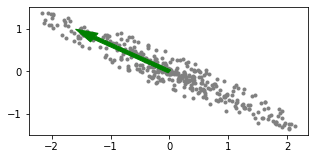

In [ ]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(311, aspect='auto')
e2 = patches.Arrow(0,0,-1.593847973468874,1,width=0.4,color='green',zorder=3)
ax.add_patch(e2)

plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='gray')

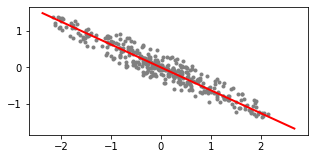

In [ ]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(311, aspect='auto')
r1 = patches.Rectangle((1.5*-1.593847973468874,1.5*1), 6, 0,
                     angle=np.arctan(1/-1.593847973468874)*180/np.pi, linewidth=2, fill=False, zorder=4, color='r')
ax.add_patch(r1)
plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='gray')